<h1>Preventing early readmission of diabetes patients in US-Hospitals</h1>

<h2>1. Introduction</h2>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>2. Data exploration</h2>

In this section, our main focus is to conduct a comprehensive analysis of the dataset to gain insights into its composition and structure. By understanding the dataset's characteristics, we aim to identify potential issues and challenges that need to be addressed during the data preprocessing stage. Key areas of investigation include the presence of missing values, identification of categorical columns, and assessment of feature variation. 

We start reading the csv file using pandas and show the size of it using the shape property.

In [6]:
data = pd.read_csv('data/diabetic_data.csv')
data.shape

(101766, 50)

From the output we see that the dataset contains more than 100.000 entries and 50 features. Having a very high number of features can lead to overfitting and is also computationally expensive. We will therefore use only a subset of the available features to create our model. We will take into consideration number of missing values, correlation with other features, feature importance and variation as criteria for selection. 

We use the info method to print some more detailed information about the dataset including the column names, their dtype and their non-null values count.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In the resulting summary we immediately notice the high number of columns with object dtype. These will need to be encoded into numerical ones if selected as relevant. Additionally, we see how apparently only two features contain null values, mainly <i>max_glu_serum</i> and <i>A1Cresult</i>. For both features the number of missing values is extremely higher compared to the number of non-null values.

We use the describe method to show more detailed information about each numerical feature separately. This includes information such as mean, standard deviation, quantiles and more. We use it then a second time with the include=object parameter to show information about object features such as unique values and frequencies.

In [7]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In the first table we see different statistical information about the numerical features. There are several columns that have the 25%, 50% and 75% quantiles equal to 0. This suggests us that these columns are highly concentrated around the value zero and that the variation may be very low. 

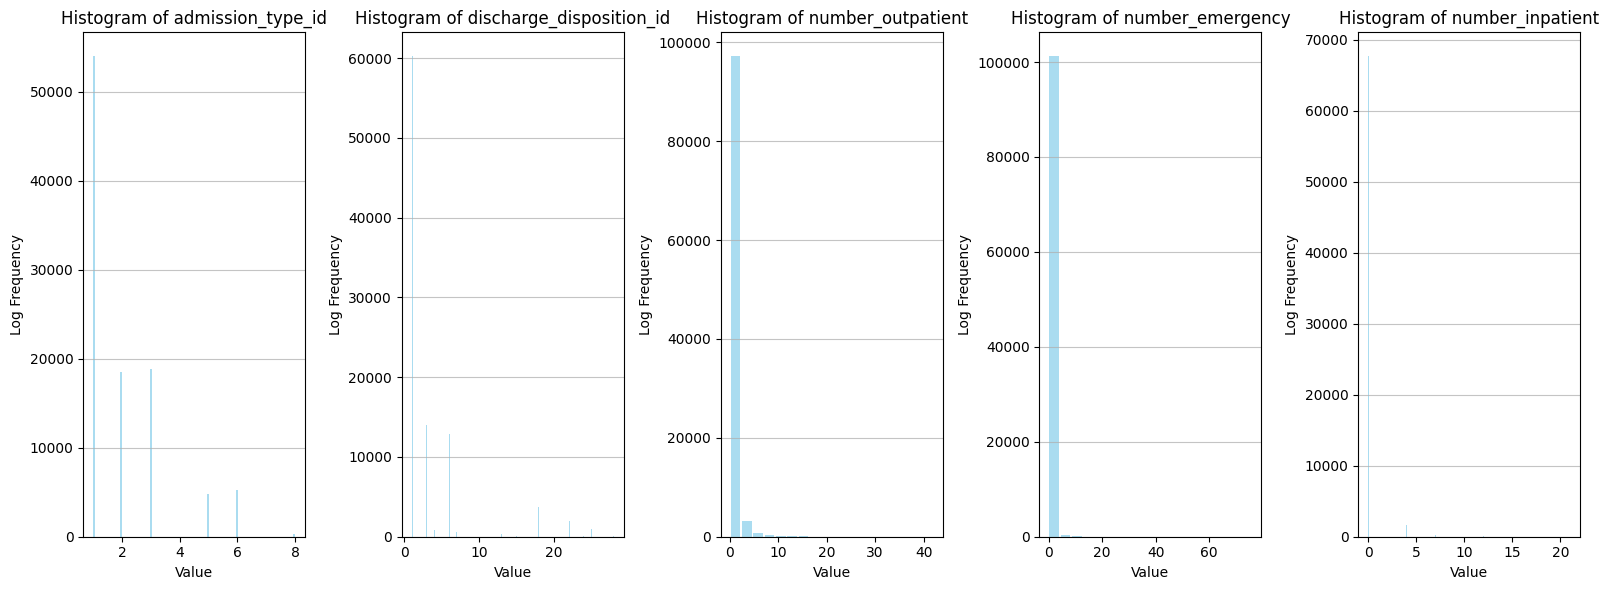

In [46]:
columns_to_plot = ['admission_type_id', 'discharge_disposition_id', 'number_outpatient', 'number_emergency', 'number_inpatient']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 6))

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.hist(data[column], bins='auto', color='skyblue', alpha=0.7, rwidth=0.85)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Log Frequency')
    ax.grid(axis='y', alpha=0.75)

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
data.describe(include='object')

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,5346,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,3,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,Norm,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,2597,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In the first table we see different statistical information about the numerical features. There are several columns that have the 25%, 50% and 75% quantiles equal to 0. This suggests us that these columns are highly concentrated around the value zero and that the variation may be very low. In the second table we see several potential issues regarding the dataset. First, we see that the symbol ? is present and probably represents a missing value. Secondly, there are columns that have the question mark as the most frequent value which indicates a high number of missing values. Thirdly, there are some columns that have only one unique value and are therefore redundant for the model training.



In [15]:
for column in data.select_dtypes(include="object").columns:
    print(column, end=" ")
    print(data[column].unique())

race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesth

In [20]:
for column in data.columns:
    if data[column].dtype == 'object':
        distinct_values = data[column].value_counts()
        print("Distinct Values:")
        print(distinct_values)
        print("\n\n")

Distinct Values:
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64



Distinct Values:
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64



Distinct Values:
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64



Distinct Values:
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64



Distinct Values:
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT

<h2>3. Data preprocessing</h2>

In [26]:
print(len(data.columns))
data = data.drop(['weight', 'examide', 'citoglipton', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'tolazamide', 'troglitazone', 'miglitol', 'tolbutamide'], axis=1)
print(len(data.columns))

50
39


In [27]:
data = data[data['gender'] != '?']

In [28]:
data_unified = data.copy()
data_unified['race'] = data_unified['race'].replace({'?': 'Other'})
data_unified['readmitted'] = data_unified['readmitted'].replace({'NO': '>30'})

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

# Assuming df is your dataset DataFrame with features and target column
# Assuming target_column is the name of your target column

df_encoded = data_unified.copy()  # Create a copy of the original DataFrame
# Initialize LabelEncoder
label_encoders = {}

# Iterate over each object column
for column in df_encoded.select_dtypes(include='object'):
    # Initialize LabelEncoder for the column
    label_encoders[column] = LabelEncoder()
    
    # Fit and transform the column with LabelEncoder
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])
    
# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['readmitted'])
y = df_encoded['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test)

# Get feature importance scores
feature_importance_scores = perm_importance.importances_mean

# Map feature importance scores to feature names
feature_importance_dict = dict(zip(X_test.columns, feature_importance_scores))

# Sort feature importance scores
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or visualize the sorted feature importance scores
print(sorted_feature_importance)

[('number_inpatient', 0.0003340866660115793), ('patient_nbr', 0.00020634764665421467), ('payer_code', 0.00020634764665419247), ('diag_2', 0.00020634764665419247), ('diag_3', 0.00016704333300578966), ('discharge_disposition_id', 0.00012773901935736465), ('encounter_id', 0.00012773901935734245), ('pioglitazone', 7.860862729682782e-05), ('num_lab_procedures', 7.860862729680562e-05), ('race', 6.878254888473823e-05), ('admission_type_id', 6.878254888473823e-05), ('change', 6.878254888473823e-05), ('gender', 6.878254888471602e-05), ('number_diagnoses', 6.878254888471602e-05), ('time_in_hospital', 5.895647047262642e-05), ('rosiglitazone', 4.913039206053682e-05), ('diabetesMed', 4.913039206051461e-05), ('admission_source_id', 3.930431364842502e-05), ('num_medications', 3.930431364840281e-05), ('number_outpatient', 1.9652156824201406e-05), ('nateglinide', 9.826078412111806e-06), ('glipizide', 9.826078412111806e-06), ('max_glu_serum', 0.0), ('metformin', 0.0), ('repaglinide', 0.0), ('chlorpropam

In [23]:
# Sort feature importance scores
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1])
for ft in sorted_feature_importance:
    print(ft)

('number_emergency', -0.00031443450918740013)
('num_medications', -0.0002063476466542369)
('diag_1', -0.00020634764665421467)
('age', -0.00018669548983001326)
('patient_nbr', -0.00017686941141790147)
('time_in_hospital', -0.00017686941141790147)
('encounter_id', -0.00016704333300581186)
('insulin', -0.00016704333300581186)
('change', -0.00015721725459370007)
('medical_specialty', -0.00013756509776949866)
('num_procedures', -0.00012773901935738685)
('number_inpatient', -0.00012773901935738685)
('diabetesMed', -9.826078412105144e-05)
('gender', -8.843470570896184e-05)
('num_lab_procedures', -8.843470570896184e-05)
('rosiglitazone', -5.895647047267083e-05)
('glipizide', -3.930431364844722e-05)
('max_glu_serum', -2.9478235236335414e-05)
('admission_type_id', -1.965215682422361e-05)
('A1Cresult', -1.965215682422361e-05)
('metformin', -1.965215682422361e-05)
('glyburide', -1.965215682422361e-05)
('payer_code', -9.82607841213401e-06)
('nateglinide', 0.0)
('chlorpropamide', 0.0)
('acetohexamid

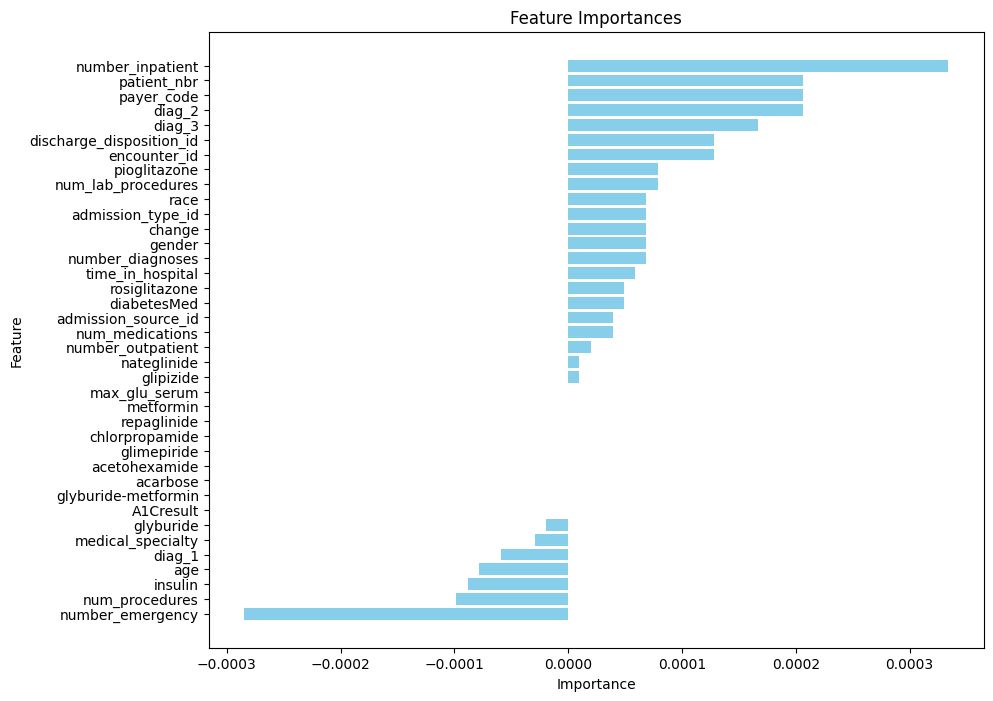

In [30]:
features = [x[0] for x in sorted_feature_importance]
importances = [x[1] for x in sorted_feature_importance]

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

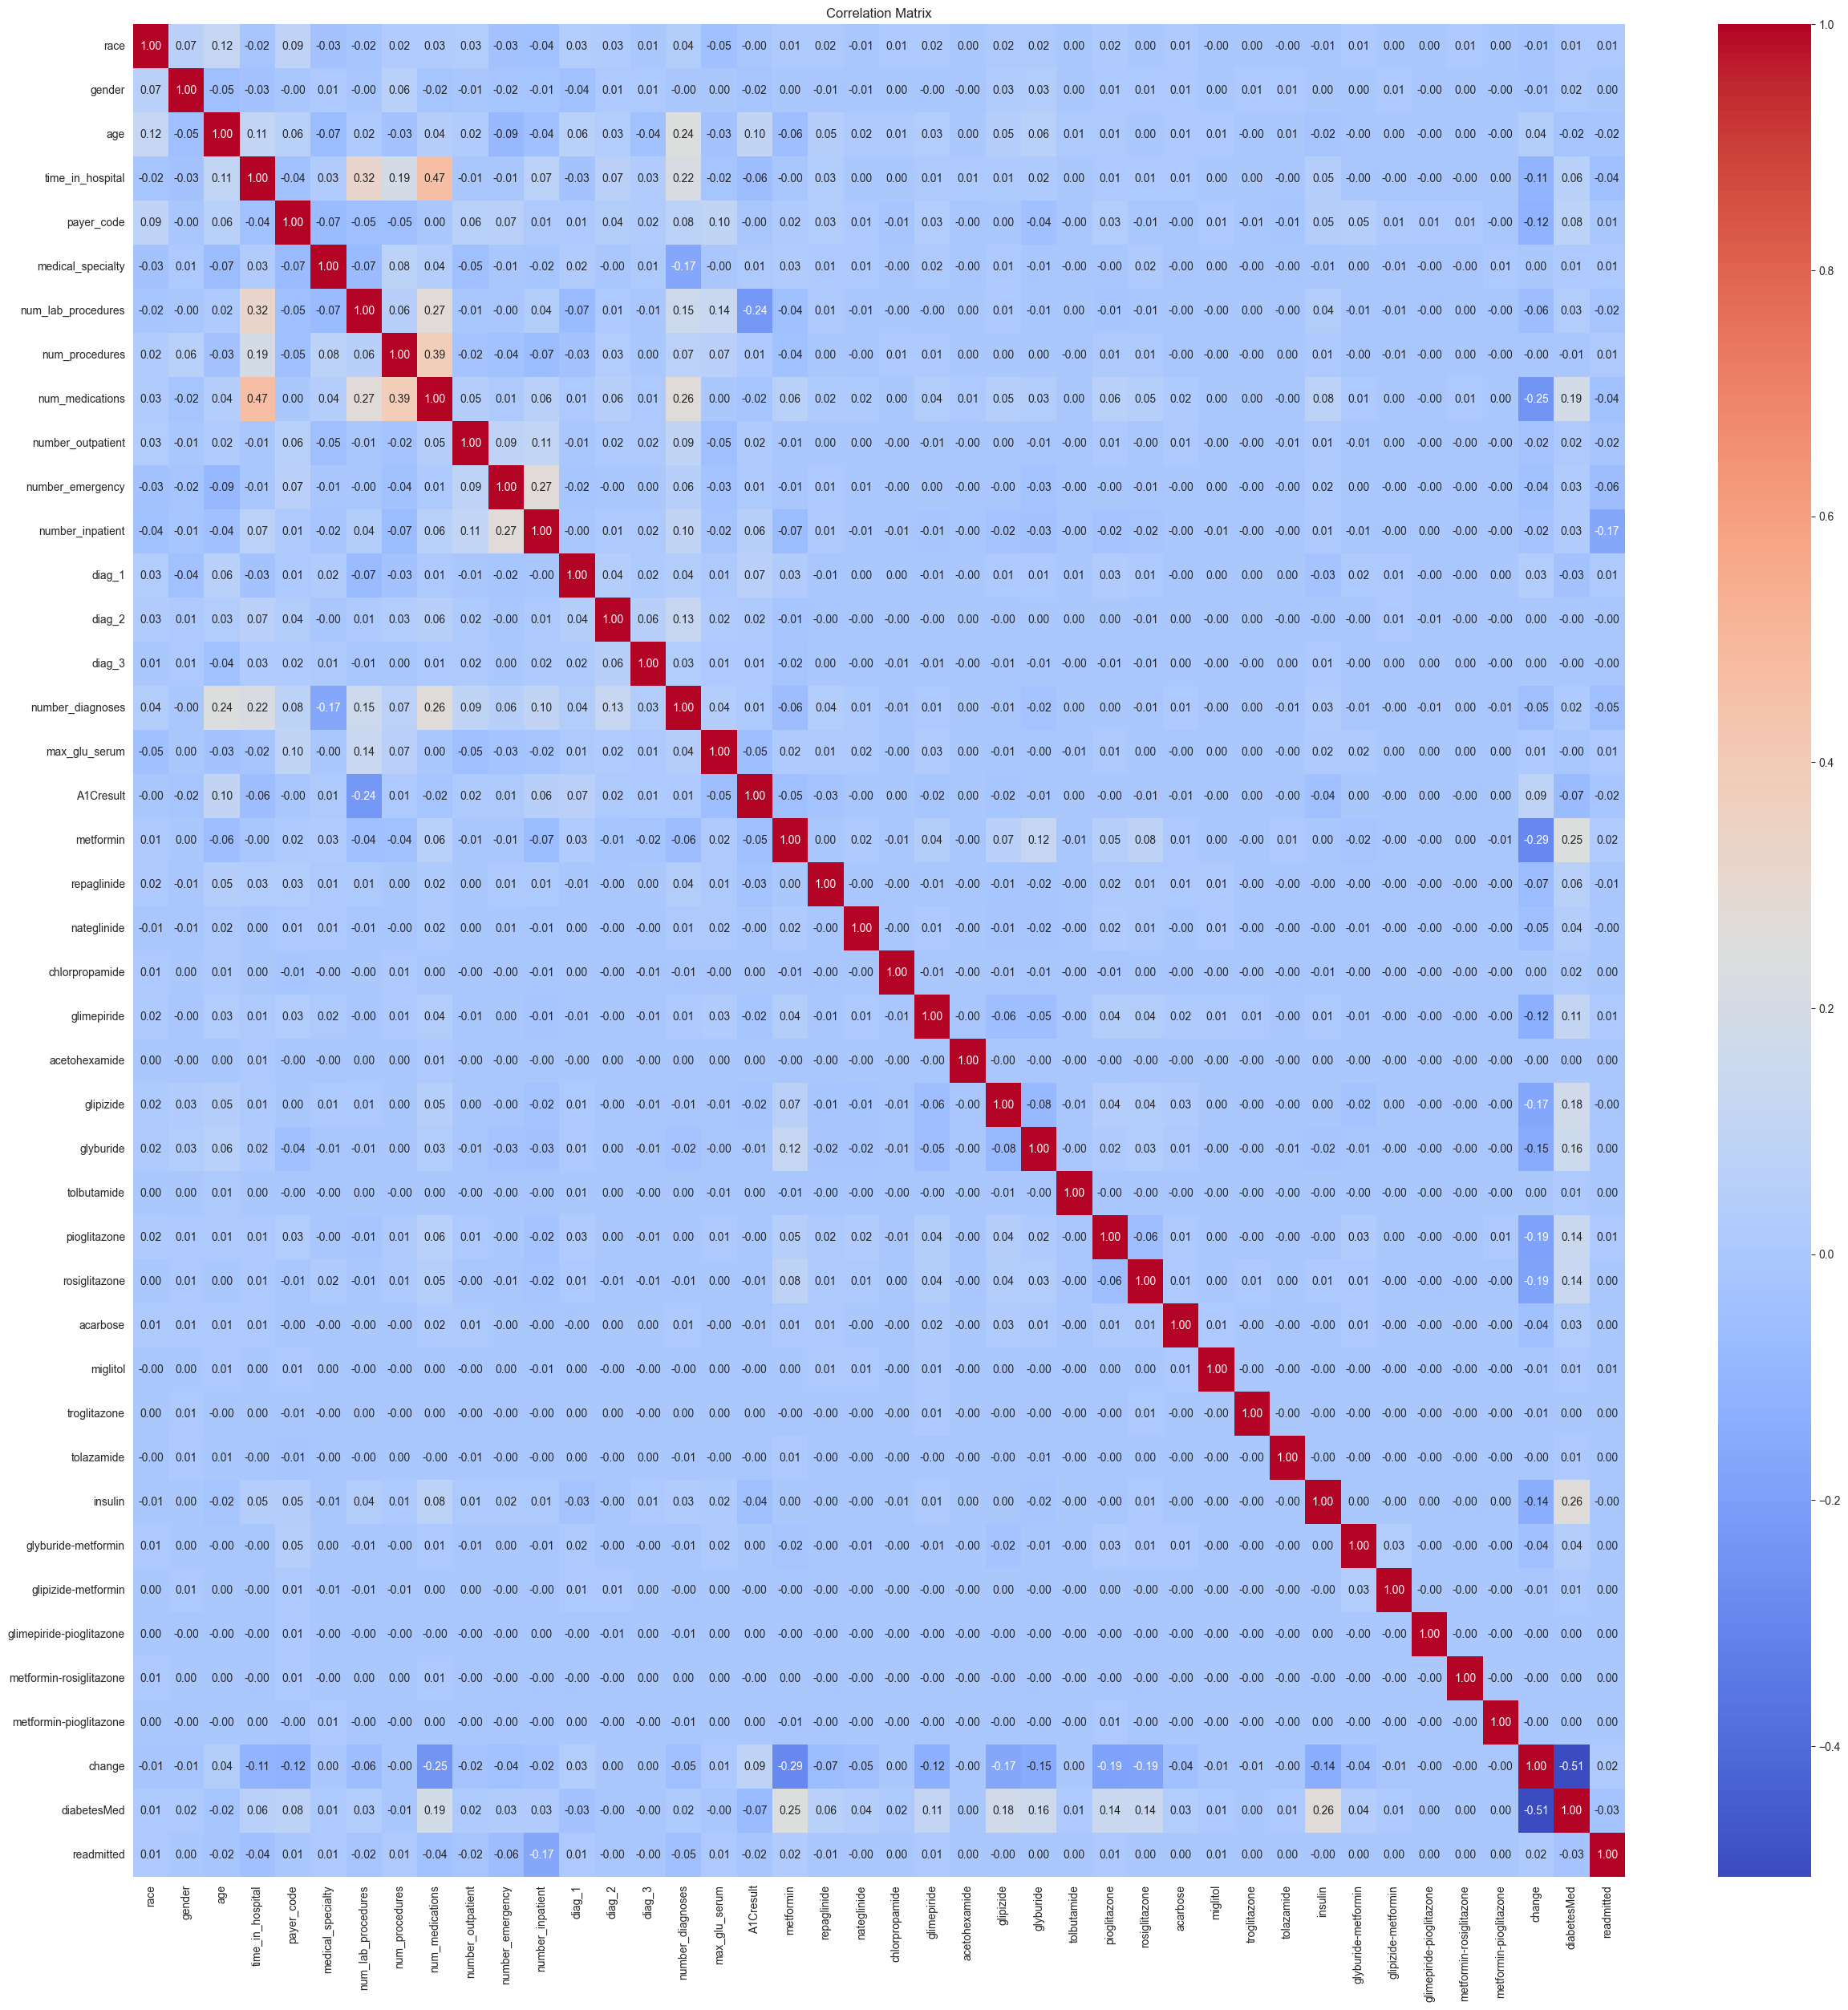

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your dataset DataFrame with object columns
df_encoded = data_unified.copy()  # Create a copy of the original DataFrame
df_encoded = df_encoded.drop(['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1)
# Initialize LabelEncoder
label_encoders = {}

# Iterate over each object column
for column in df_encoded.select_dtypes(include='object'):
    # Initialize LabelEncoder for the column
    label_encoders[column] = LabelEncoder()
    
    # Fit and transform the column with LabelEncoder
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

# Now, let's create a correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()